<a href="https://colab.research.google.com/github/Pshak-20000/Collab_NBA_ETL/blob/main/notebookab4c38f8ac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
eduardopalmieri_nba_player_stats_season_2425_path = kagglehub.dataset_download('eduardopalmieri/nba-player-stats-season-2425')

print('Data source import complete.')



100%|██████████| 92.3k/92.3k [00:00<00:00, 26.4MB/s]

Extracting files...
Data source import complete.


In [6]:
from pyspark.sql import SparkSession

In [8]:
spark = SparkSession.builder \
    .appName("NBA Player Stats Analysis") \
    .getOrCreate()

In [17]:
import os
filepath=os.path.join(eduardopalmieri_nba_player_stats_season_2425_path,'nba_player_stats_2425.csv')
file_path = '/root/.cache/kagglehub/datasets/eduardopalmieri/nba-player-stats-season-2425/versions/6/nba_player_stats_2425.csv'
print(eduardopalmieri_nba_player_stats_season_2425_path)


/root/.cache/kagglehub/datasets/eduardopalmieri/nba-player-stats-season-2425/versions/6


In [21]:
# Dynamically generate the file path using os.path.join
filepath = os.path.join(eduardopalmieri_nba_player_stats_season_2425_path, 'database_24_25.csv')
print("Files in dataset directory:", os.listdir(eduardopalmieri_nba_player_stats_season_2425_path))
# Check the generated file path
print("Generated File Path:", filepath)

# Check if the file exists at the generated path
if os.path.exists(filepath):
    print(f"File exists at {filepath}")
else:
    print(f"File not found at {filepath}")

Files in dataset directory: ['database_24_25.csv']
Generated File Path: /root/.cache/kagglehub/datasets/eduardopalmieri/nba-player-stats-season-2425/versions/6/database_24_25.csv
File exists at /root/.cache/kagglehub/datasets/eduardopalmieri/nba-player-stats-season-2425/versions/6/database_24_25.csv


In [23]:
df=spark.read.csv(filepath,header=True,inferSchema=True)
df.show(5)
df.printSchema()

+-------------+---+---+---+-----+---+---+-----+---+---+-----+---+---+-----+---+---+---+---+---+---+---+---+---+----+----------+
|       Player| Tm|Opp|Res|   MP| FG|FGA|  FG%| 3P|3PA|  3P%| FT|FTA|  FT%|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|GmSc|      Data|
+-------------+---+---+---+-----+---+---+-----+---+---+-----+---+---+-----+---+---+---+---+---+---+---+---+---+----+----------+
| Jayson Tatum|BOS|NYK|  W| 30.3| 14| 18|0.778|  8| 11|0.727|  1|  2|  0.5|  0|  4|  4| 10|  1|  1|  1|  1| 37|38.1|2024-10-22|
|Anthony Davis|LAL|MIN|  W|37.58| 11| 23|0.478|  1|  3|0.333| 13| 15|0.867|  3| 13| 16|  4|  1|  3|  1|  1| 36|34.0|2024-10-22|
|Derrick White|BOS|NYK|  W|26.63|  8| 13|0.615|  6| 10|  0.6|  2|  2|  1.0|  0|  3|  3|  4|  1|  0|  0|  1| 24|22.4|2024-10-22|
| Jrue Holiday|BOS|NYK|  W|30.52|  7|  9|0.778|  4|  6|0.667|  0|  0|  0.0|  2|  2|  4|  4|  1|  0|  0|  2| 18|19.5|2024-10-22|
|Miles McBride|NYK|BOS|  L|25.85|  8| 10|  0.8|  4|  5|  0.8|  2|  3|0.667|  0|  0|  0|  2|  0|  0|  1| 

In [29]:
from pyspark.sql.functions import sum,col
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+
|Player| Tm|Opp|Res| MP| FG|FGA|FG%| 3P|3PA|3P%| FT|FTA|FT%|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|GmSc|Data|
+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+
|     0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|   0|   0|
+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+



In [33]:
duplicate_count = df.count() - df.distinct().count()

print(f"Number of duplicate rows: {duplicate_count}")
df.dropDuplicates()

Number of duplicate rows: 0


DataFrame[Player: string, Tm: string, Opp: string, Res: string, MP: double, FG: int, FGA: int, FG%: double, 3P: int, 3PA: int, 3P%: double, FT: int, FTA: int, FT%: double, ORB: int, DRB: int, TRB: int, AST: int, STL: int, BLK: int, TOV: int, PF: int, PTS: int, GmSc: double, Data: date]

Points (PTS): A measure of the player's scoring performance.
Assists (AST): How well the player is helping teammates score.
Rebounds (TRB): A measure of the player’s effort in securing missed shots.
Efficiency Metrics: FG%, 3P%, FT% indicate how efficient the player is in scoring.
Game Performance: GmSc gives an overall score combining multiple performance aspects.

In [34]:
df_cleaned.describe().show()

+-------+---------------+----+----+----+------------------+------------------+-----------------+-------------------+-----------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+
|summary|         Player|  Tm| Opp| Res|                MP|                FG|              FGA|                FG%|               3P|               3PA|                3P%|               FT|               FTA|                FT%|               ORB|               DRB|              TRB|               AST|               STL|                BLK|               TOV|                PF|              PTS|             GmSc|
+-------+---------------+----+----+----+------------------+------------------+-----------------+-------------------+-----------------+------------------+---------

Filter Out Unwanted or Incorrect Data:

In [36]:
df_cleaned = df_cleaned.filter(df.PTS >= 0)


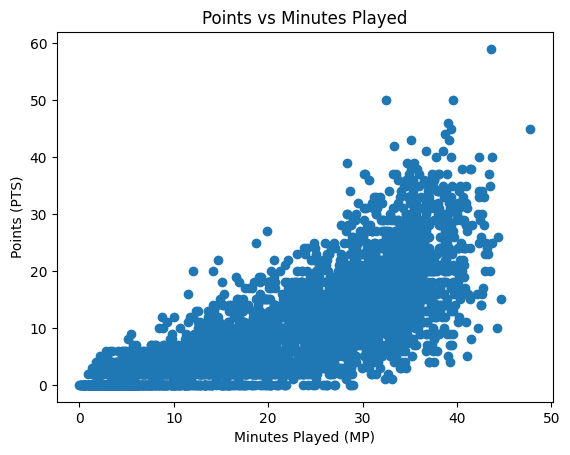

In [38]:
import matplotlib.pyplot as plt

# Collect the data to plot (sample data for smaller dataset size)
data = df_cleaned.select("MP", "PTS").toPandas()

plt.scatter(data["MP"], data["PTS"])
plt.title('Points vs Minutes Played')
plt.xlabel('Minutes Played (MP)')
plt.ylabel('Points (PTS)')
plt.show()


In [42]:
top_players = df_cleaned.orderBy(col("PTS").desc()).limit(5)
top_players.select(['Player']).show(truncate=False)


+-----------------------+
|Player                 |
+-----------------------+
|Giannis Antetokounmpo  |
|Paolo Banchero         |
|Victor Wembanyama      |
|Karl-Anthony Towns     |
|Shai Gilgeous-Alexander|
+-----------------------+

